# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: 05.10.2020

Мягкий дедлайн: 01:59MSK 19.10.2020 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 01:59MSK 22.10.2020

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10 + ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — стохастический, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и разобраться как подбирать гиперпараметры для этих методов.

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ - это оценка градиента по одному объекту, выбранному случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k}}} \nabla_{w} Q(w_{k}).
$$

Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

## Задание 2. Реализация линейной регресии (1.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` - **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами python допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Евклидова норма разности весов на двух соседних итерациях меньше `tolerance`.
    * Достижение максимального числа итераций `max_iter`.
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь для каждой итерации, начиная с нулевой (до первого шага).
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed).

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
)
from utils import LinearRegression

In [3]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0

In [4]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [5]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [6]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [7]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [8]:
# LinearRegression

regression = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 2),
    tolerance = tolerance,
    max_iter = max_iter
)

regression.fit(X, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

prediction = regression.predict(X)

assert prediction.shape[0] == num_objects, 'Predict failed'

Если ваше решение прошло все тесты локально, то теперь осталось протестировать его в Яндекс Контесте - **https://contest.yandex.ru/contest/19551**.

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **GradientDescent**: [36675758](https://contest.yandex.ru/contest/19551/run-report/36675758/)
* **StochasticDescent**: [36680027](https://contest.yandex.ru/contest/19551/run-report/36680027/)
* **MomentumDescent**: [36684659](https://contest.yandex.ru/contest/19551/run-report/36684659/)
* **Adagrad**: [36679654](https://contest.yandex.ru/contest/19551/run-report/36679654/)
* **LinearRegression**: [36879202](https://contest.yandex.ru/contest/19551/run-report/36879202/)

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.
Для дальнейшей работы сделайте следующее:
* Проведите разумную предобработку данных.
* Замените целевую переменную на её логарифм.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1.

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

In [10]:
df = pd.read_csv('autos.csv')
df.head(3)

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,2001,6,2016-03-17 00:00:00,2016-03-17 17:40:17,91074,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,2008,7,2016-03-31 00:00:00,2016-04-06 10:17:21,60437,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,1995,10,2016-04-04 00:00:00,2016-04-06 19:17:07,33775,650


In [11]:
# get log of target values
df.loc[:, 'log_price'] = np.log(df.price)

Посмотрим на типы признаков:

In [12]:
df.dtypes

brand                   object
model                   object
vehicleType             object
gearbox                 object
fuelType                object
notRepairedDamage       object
powerPS                  int64
kilometer                int64
yearOfRegistration       int64
monthOfRegistration      int64
dateCreated             object
lastSeen                object
postalCode               int64
price                    int64
log_price              float64
dtype: object

In [13]:
# change binary feature values to 0 and 1
df.notRepairedDamage = 1 * (df.notRepairedDamage == 'ja')

Проверим данные на наличие пропусков:

In [14]:
df.isna().sum()

brand                  0
model                  0
vehicleType            0
gearbox                0
fuelType               0
notRepairedDamage      0
powerPS                0
kilometer              0
yearOfRegistration     0
monthOfRegistration    0
dateCreated            0
lastSeen               0
postalCode             0
price                  0
log_price              0
dtype: int64

Проверим, что признаки имеют неслишком большое количество уникальных значений (относительно кол-ва объектов). Выбросим незначимые признаки и признаки со слишком большим количеством значений.

In [15]:
print('Number of objects:', df.shape[0])
for col in df.columns:
    print(col, df[col].nunique())

Number of objects: 247872
brand 39
model 250
vehicleType 8
gearbox 2
fuelType 7
notRepairedDamage 2
powerPS 496
kilometer 13
yearOfRegistration 85
monthOfRegistration 13
dateCreated 107
lastSeen 129878
postalCode 8070
price 4951
log_price 4951


In [16]:
# split dataset into train, test, val

from sklearn.model_selection import train_test_split

y_df = df['log_price']
X_df = df.drop(columns=['price', 'log_price', 'dateCreated', 'lastSeen', 'postalCode'])
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.75, random_state=10)

Рассмотрим признаки `kilometer` и `powerPS`, определим, к каким признакам их отнести (категориальным или численным), все остальные признаки - категориальные (кроме бинарного признака `notRepairedDamage`)

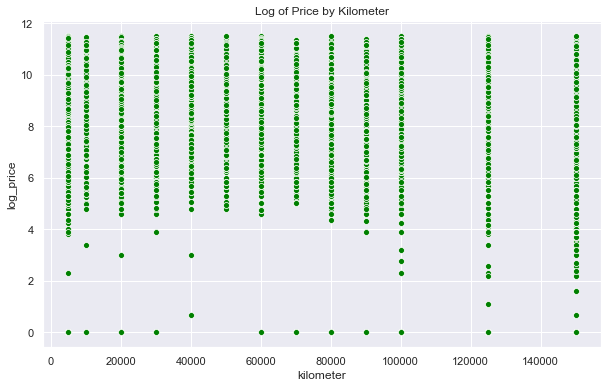

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='kilometer', y='log_price', color='green').set_title('Log of Price by Kilometer')
plt.show()

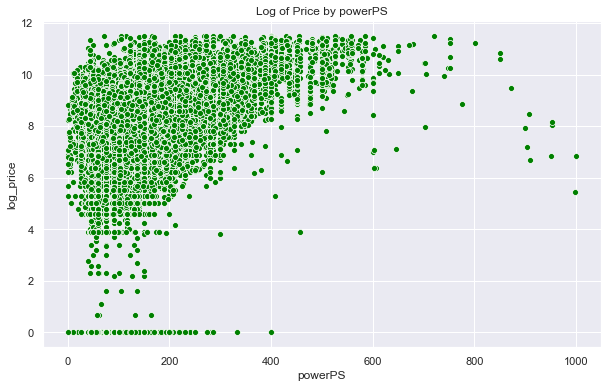

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='powerPS', y='log_price', color='green').set_title('Log of Price by powerPS')
plt.show()

Заметим, что для признака `kilometer` нет линейной зависимости с целевой переменной, поэтому отнесём её к категориальным признакам. Признак `powerPS` отнесём к численным.

In [19]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType', 'yearOfRegistration', 'monthOfRegistration', 'kilometer']
numerical = ['powerPS']

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (1.5 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и R^2 на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (0.5 балла)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
        ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
        ('scaling', StandardScaler(), numerical)
])

In [22]:
lambdas = np.logspace(-3, 0, 10)
best_reg_fg = None
mse_fg = 100
lambda_fg = None

for cur_lambda in lambdas:
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent = GradientDescent(lambda_ = cur_lambda, w0 = None),
            max_iter = 100
            )
        )
    ]) 
    regression = pipeline.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if (mse < mse_fg):
        best_reg_fg = regression
        mse_fg = mse
        lambda_fg = cur_lambda

In [23]:
lambdas = np.logspace(-3, 0, 10)
best_reg_sgd = None
mse_sgd = 100
lambda_sgd = None

for cur_lambda in lambdas:
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent = StochasticDescent(lambda_ = cur_lambda, batch_size = 1, w0 = None),
            max_iter = 100
            )
        )
    ]) 
    regression = pipeline.fit(X_train, y_train.reset_index(drop=True))
    y_pred = regression.predict(X_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if (mse < mse_sgd):
        best_reg_sgd = regression
        mse_sgd = mse
        lambda_sgd = cur_lambda

In [24]:
lambdas = np.logspace(-3, 0, 10)
best_reg_mnt = None
mse_mnt = 100
lambda_mnt = None

for cur_lambda in lambdas:
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent = MomentumDescent(lambda_ = cur_lambda, w0 = None),
            max_iter = 100
            )
        )
    ]) 
    regression = pipeline.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if (mse < mse_mnt):
        best_reg_mnt = regression
        mse_mnt = mse
        lambda_mnt = cur_lambda

In [25]:
lambdas = np.logspace(-3, 0, 10)
best_reg_adag = None
mse_adag = 100
lambda_adag = None

for cur_lambda in lambdas:
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent = Adagrad(lambda_ = cur_lambda, w0 = None),
            max_iter = 100
            )
        )
    ]) 
    regression = pipeline.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if (mse < mse_adag):
        best_reg_adag = regression
        mse_adag = mse
        lambda_adag = cur_lambda

In [26]:
best_regs = [(best_reg_fg, 'Gradient Descent'), (best_reg_sgd, 'Stochastic Descent'), 
             (best_reg_mnt, 'Momentum Descent'), (best_reg_adag, 'Adagrad')]
for reg, name in best_regs:
    print(name)
    y_train_pred = reg.predict(X_train)
    mse_train = mean_squared_error(y_train_pred, y_train)
    r2_train = r2_score(y_train, y_train_pred)
    y_pred = reg.predict(X_test)
    mse_test = mean_squared_error(y_pred, y_test)
    r2_test = r2_score(y_test, y_pred)
    print('Train:','\tMSE: %.4f \tR2: %.4f' % (mse_train, r2_train))
    print('Test:','\tMSE: %.4f \tR2: %.4f' % (mse_test, r2_test))
    print('Number of steps:', len(reg[1].loss_history) - 1, '\n')

Gradient Descent
Train: 	MSE: 0.6888 	R2: 0.5012
Test: 	MSE: 0.6958 	R2: 0.5031
Number of steps: 33 

Stochastic Descent
Train: 	MSE: 7.3564 	R2: -4.3267
Test: 	MSE: 7.3333 	R2: -4.2367
Number of steps: 41 

Momentum Descent
Train: 	MSE: 0.6536 	R2: 0.5267
Test: 	MSE: 0.6614 	R2: 0.5277
Number of steps: 33 

Adagrad
Train: 	MSE: 0.3123 	R2: 0.7739
Test: 	MSE: 0.3349 	R2: 0.7608
Number of steps: 72 



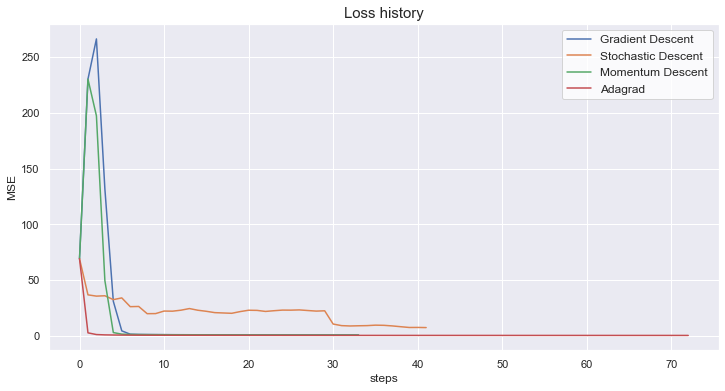

In [27]:
plt.figure(figsize=(12,6))
for reg, name in best_regs:
    plt.plot(reg[1].loss_history, label=name)
plt.legend(facecolor='white', fontsize=12)
plt.title('Loss history', size=15)
plt.xlabel('steps', size=12)
plt.ylabel('MSE', size=12)
plt.show()

## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [28]:
import time

In [29]:
batch_sizes = np.arange(5, 500, 10)
k = 4
steps = []
times = []

for batch_size in batch_sizes:
    cur_steps = []
    cur_times = []
    for i in range(k):
        pipeline = Pipeline(steps=[
            ('col_transform', column_transformer),
            ('regression', LinearRegression(
                descent = StochasticDescent(lambda_ = lambda_sgd, batch_size = batch_size, w0 = None),
                max_iter = 100
                )
            )
        ]) 
        start_time = time.time()
        regression = pipeline.fit(X_train, y_train.reset_index(drop=True))
        
        cur_times.append(time.time() - start_time)
        cur_steps.append(len(regression[1].loss_history) - 1)
        
    steps.append((np.mean(cur_steps), np.var(cur_steps)))
    times.append((np.mean(cur_times), np.var(cur_times)))

Variances:
[139.6875, 176.1875, 42.1875, 32.1875, 4.25, 11.1875, 19.0, 14.75, 6.1875, 1.5, 2.0, 8.1875, 18.6875, 18.6875, 5.5, 4.6875, 2.5, 2.25, 12.6875, 1.5, 12.25, 1.6875, 15.5, 0.6875, 2.5, 3.25, 5.25, 8.6875, 20.1875, 9.1875, 2.5, 2.6875, 8.5, 2.1875, 6.5, 0.6875, 8.25, 6.5, 4.5, 0.5, 3.1875, 0.75, 1.6875, 2.5, 0.0, 10.6875, 0.5, 3.6875, 2.1875, 4.25]


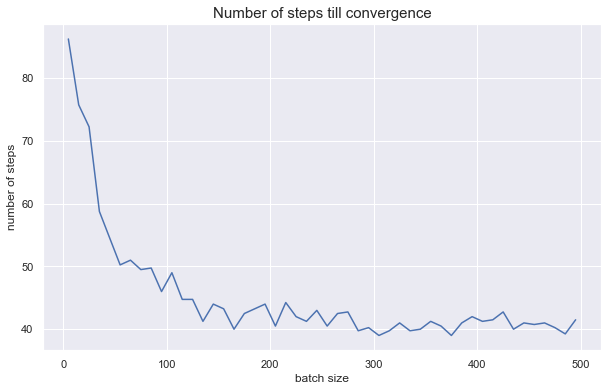

In [48]:
print('Variances:', [a_tuple[1] for a_tuple in steps], sep='\n')
plt.figure(figsize=(10,6))
plt.title('Number of steps till convergence', size=15)
plt.plot(batch_sizes, [a_tuple[0] for a_tuple in steps])
plt.xlabel('batch size', size=12)
plt.ylabel('number of steps', size=12)
plt.show()

Variances:
['0.2859', '0.2166', '0.0551', '0.1148', '0.0197', '0.0172', '0.1787', '0.0506', '0.0649', '0.2646', '0.3950', '0.0993', '0.2253', '0.2873', '0.0528', '0.1383', '0.4204', '0.0175', '0.1061', '0.0064', '0.0308', '0.0022', '0.0164', '0.0760', '0.2546', '0.0292', '0.1270', '0.0721', '0.0376', '0.0688', '0.0390', '0.0659', '0.0932', '0.0599', '0.0216', '0.0017', '0.0308', '0.0260', '0.0193', '0.0070', '0.0176', '0.0079', '0.0055', '0.0142', '0.0021', '0.0564', '0.0109', '0.1829', '0.0773', '0.0217']


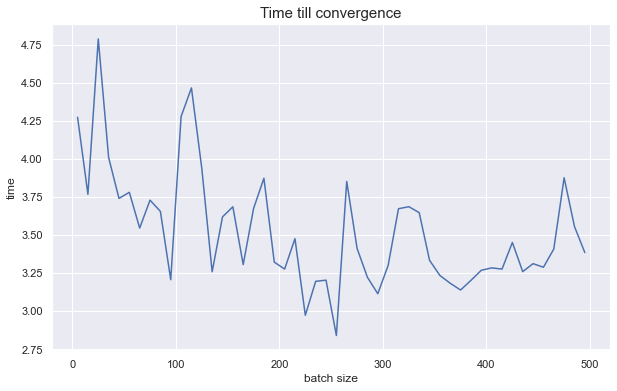

In [52]:
print('Variances:', ['%.4f' % a_tuple[1] for a_tuple in times], sep='\n')
plt.figure(figsize=(10,6))
plt.title('Time till convergence', size=15)
plt.plot(batch_sizes, [a_tuple[0] for a_tuple in times])
plt.xlabel('batch size', size=12)
plt.ylabel('time', size=12)
plt.show()

Как можно увидеть на графиках, с увеличением размера батча количество итераций уменьшается (оценка становится ближе к полному градиенту). Время подсчёта варьируется - для маленьких значений оно велико, вероятно, из-за необходимого большого кол-ва итераций до сходимости, минимальное значение времени наблюдается примерно для среднего значения размера батча (~250), после этого время начинает увеличиваться (поскольку увеличивается кол-во векторов, для которых нужно посчитать градиент). Значит, стоит брать значение размера батча не слишком большим, но и не слишком маленьким (сходимость после определённого значения размера достигается примерно через одинаковое кол-во шагов).

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. (Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов). Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 +  \dfrac{\mu}{2} \| w \|^2
$$

Допишите классы **GradientDescentReg**, **StochasticDescentReg**, **MomentumDescentReg**, **AdagradReg** в файле `utils.py`. Мы будем использовать тот же самый класс для линейной регрессии, так как для сравнения методов с регуляризацией и без неё нам нужна только MSE часть функции потерь.

Найдите по валидационной выборке лучшие параметры обучения с регуляризацией. Сравните для каждого метода результаты на тестовой выборке по метрикам MSE и R^2 с регуляризацией и без регуляризации. Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации.

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Чем вы можете объяснить это?

In [32]:
%autoreload 2

from utils import (
    AdagradReg,
    GradientDescentReg,
    MomentumDescentReg,
    StochasticDescentReg,
)

In [33]:
mus = np.logspace(-3, 0, 10)
best_reg_fgr = None
mse_fgr = 100
mu_fgr = None

for cur_mu in mus:
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent = GradientDescentReg(mu = cur_mu, lambda_ = lambda_fg, w0 = None),
            max_iter = 100
            )
        )
    ]) 
    regression = pipeline.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if (mse < mse_fgr):
        best_reg_fgr = regression
        mse_fgr = mse
        mu_fgr = cur_mu

In [34]:
y_reg_predict = best_reg_fgr.predict(X_test)
y_predict = best_reg_fg.predict(X_test)
print('MSE')
print('with regularization: %.4f \twithout regularization: %.4f' % 
      (mean_squared_error(y_reg_predict, y_test), mean_squared_error(y_predict, y_test)))
print('R2')
print('with regularization: %.4f \twithout regularization: %.4f' % 
      (r2_score(y_test, y_reg_predict), r2_score(y_test, y_predict)))

MSE
with regularization: 0.7002 	without regularization: 0.6958
R2
with regularization: 0.5000 	without regularization: 0.5031


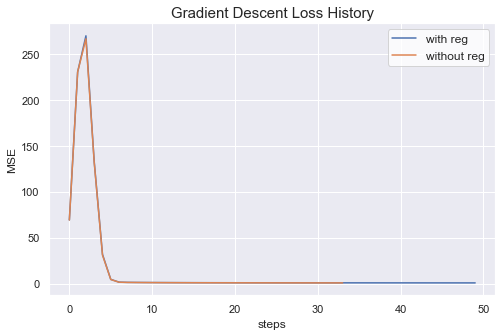

In [54]:
plt.figure(figsize=(8,5))
plt.xlabel('steps')
plt.ylabel('MSE')
plt.title('Gradient Descent Loss History', size=15)
plt.plot(best_reg_fgr[1].loss_history, label='with reg')
plt.plot(best_reg_fg[1].loss_history, label='without reg')
plt.legend(facecolor='white', fontsize=12)
plt.show()

In [36]:
mus = np.logspace(-3, 0, 10)
best_reg_sgdr = None
mse_sgdr = 100
mu_sgdr = None

for cur_mu in mus:
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent = StochasticDescentReg(mu = cur_mu, lambda_ = lambda_sgd, w0 = None),
            max_iter = 100
            )
        )
    ]) 
    regression = pipeline.fit(X_train, y_train.reset_index(drop=True))
    y_pred = regression.predict(X_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if (mse < mse_sgdr):
        best_reg_sgdr = regression
        mse_sgdr = mse
        mu_sgdr = cur_mu

In [37]:
y_reg_predict = best_reg_sgdr.predict(X_test)
y_predict = best_reg_sgd.predict(X_test)
print('MSE')
print('with regularization: %.4f \twithout regularization: %.4f' % 
      (mean_squared_error(y_reg_predict, y_test), mean_squared_error(y_predict, y_test)))
print('R2')
print('with regularization: %.4f \twithout regularization: %.4f' % 
      (r2_score(y_test, y_reg_predict), r2_score(y_test, y_predict)))

MSE
with regularization: 4.8874 	without regularization: 7.3333
R2
with regularization: -2.4901 	without regularization: -4.2367


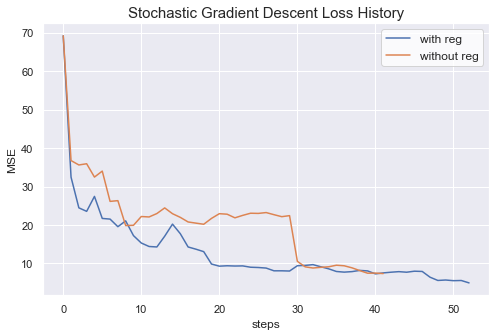

In [55]:
plt.figure(figsize=(8,5))
plt.xlabel('steps')
plt.ylabel('MSE')
plt.title('Stochastic Gradient Descent Loss History', size=15)
plt.plot(best_reg_sgdr[1].loss_history, label='with reg')
plt.plot(best_reg_sgd[1].loss_history, label='without reg')
plt.legend(facecolor='white', fontsize=12)
plt.show()

In [39]:
mus = np.logspace(-3, 0, 10)
best_reg_mntr = None
mse_mntr = 100
mu_mntr = None

for cur_mu in mus:
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent = MomentumDescentReg(mu = cur_mu, lambda_ = lambda_mnt, w0 = None),
            max_iter = 100
            )
        )
    ]) 
    regression = pipeline.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if (mse < mse_mntr):
        best_reg_mntr = regression
        mse_mntr = mse
        mu_mntr = cur_mu

In [40]:
y_reg_predict = best_reg_mntr.predict(X_test)
y_predict = best_reg_mnt.predict(X_test)
print('MSE')
print('with regularization: %.4f \twithout regularization: %.4f' % 
      (mean_squared_error(y_reg_predict, y_test), mean_squared_error(y_predict, y_test)))
print('R2')
print('with regularization: %.4f \twithout regularization: %.4f' % 
      (r2_score(y_test, y_reg_predict), r2_score(y_test, y_predict)))

MSE
with regularization: 0.6555 	without regularization: 0.6614
R2
with regularization: 0.5319 	without regularization: 0.5277


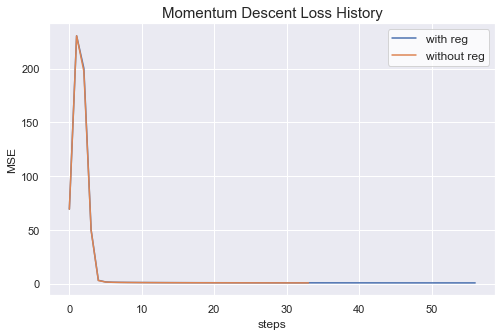

In [56]:
plt.figure(figsize=(8,5))
plt.xlabel('steps')
plt.ylabel('MSE')
plt.title('Momentum Descent Loss History', size=15)
plt.plot(best_reg_mntr[1].loss_history, label='with reg')
plt.plot(best_reg_mnt[1].loss_history, label='without reg')
plt.legend(facecolor='white', fontsize=12)
plt.show()

In [42]:
mus = np.logspace(-3, 0, 10)
best_reg_adagr = None
mse_adagr = 100
mu_adagr = None

for cur_mu in mus:
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent = AdagradReg(mu = cur_mu, lambda_ = lambda_adag, w0 = None),
            max_iter = 100
            )
        )
    ]) 
    regression = pipeline.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if (mse < mse_adagr):
        best_reg_adagr = regression
        mse_adagr = mse
        mu_adagr = cur_mu

In [43]:
y_reg_predict = best_reg_adagr.predict(X_test)
y_predict = best_reg_adag.predict(X_test)
print('MSE')
print('with regularization: %.4f \twithout regularization: %.4f' % 
      (mean_squared_error(y_reg_predict, y_test), mean_squared_error(y_predict, y_test)))
print('R2')
print('with regularization: %.4f \twithout regularization: %.4f' % 
      (r2_score(y_test, y_reg_predict), r2_score(y_test, y_predict)))

MSE
with regularization: 2.3479 	without regularization: 0.3349
R2
with regularization: -0.6767 	without regularization: 0.7608


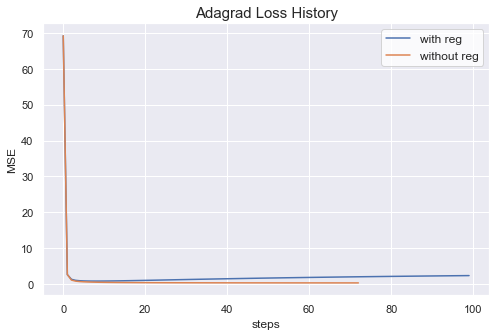

In [57]:
plt.figure(figsize=(8,5))
plt.xlabel('steps')
plt.ylabel('MSE')
plt.title('Adagrad Loss History', size=15)
plt.plot(best_reg_adagr[1].loss_history, label='with reg')
plt.plot(best_reg_adag[1].loss_history, label='without reg')
plt.legend(facecolor='white', fontsize=12)
plt.show()

С регуляризацией количество итераций до сходимости больше, поскольку добавляется дополнительное условие на веса. Однако, качество модели на тестовой выборке для моделей SGD и Momentum улучшается.

## Задание 8. Бонус — Реализация метода SAG (2 балла)

В качестве бонуса вам будет следующее задание - напишите собственную реализацию стохастического градиентного спуска по методу SAG в файле `utils.py`. Подробнее прочитать про SAG можно [здесь](https://arxiv.org/pdf/1309.2388.pdf).

Сравните свою реализацию метода SAG с обычным полным градиентным спуском на наших данных. Проведите сравнение аналогично заданию 5. Что вы можете сказать про сходимость этого метода?

In [45]:
%autoreload 2

from utils import (StochasticAverageGradient)

In [46]:
lambdas = np.logspace(-3, 0, 10)
best_reg_sag = None
mse_sag = 100
lambda_sag = None

for cur_lambda in lambdas:
    pipeline = Pipeline(steps=[
        ('col_transform', column_transformer),
        ('regression', LinearRegression(
            descent = StochasticAverageGradient(lambda_ = cur_lambda, x_shape = X_train.shape[0], 
                                                w0 = np.zeros(column_transformer.fit_transform(X_train).shape[1])),
            max_iter = 100, tolerance=0
            )
        )
    ]) 
    regression = pipeline.fit(X_train, y_train.reset_index(drop=True))
    y_pred = regression.predict(X_val)
    mse = mean_squared_error(y_val, y_pred, squared=True)
    if (mse < mse_sag):
        best_reg_sag = regression
        mse_sag = mse
        lambda_sag = cur_lambda

In [47]:
y_sag_pred = best_reg_sag.predict(X_test)
y_fg_pred = best_reg_fg.predict(X_test)
print('MSE')
print('SAG: %.4f \tGradient Descent: %.4f' % (mean_squared_error(y_sag_pred, y_test), mean_squared_error(y_fg_pred, y_test)))
print('R2')
print('SAG: %.4f \tGradient Descent: %.4f' % (r2_score(y_sag_pred, y_test), r2_score(y_fg_pred, y_test)))

MSE
SAG: 67.4869 	Gradient Descent: 0.6958
R2
SAG: -74406.8067 	Gradient Descent: 0.3506


¯ \ _ (ツ) _ / ¯

Вставьте картинку или видео, описывающие ваш опыт выполнения этого задания.

<img src = 'https://media.giphy.com/media/3o7TKEP6YngkCKFofC/giphy.gif' width=400>